In [1]:
# Fetching the data using API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0277e459-981d-4870-a669-84e415dc3dea',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-18T21:16:51.536Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9884}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11779, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd


pd.set_option("display.max_columns",10)
pd.set_option("display.max_rows",10)

In [4]:
# Transforming it into Dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [5]:
df

,id,name,symbol,slug,num_market_pairs,...,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11779,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
1,1027,Ethereum,ETH,ethereum,9431,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
2,825,Tether USDt,USDT,tether,100714,...,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-18 17:16:51.932722
3,1839,BNB,BNB,bnb,2263,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
4,5426,Solana,SOL,solana,767,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
...,...,...,...,...,...,...,...,...,...,...,...
10,2010,Cardano,ADA,cardano,1270,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
11,5805,Avalanche,AVAX,avalanche,790,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722
12,5994,Shiba Inu,SHIB,shiba-inu,888,...,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-10-18 17:16:51.932722
13,1831,Bitcoin Cash,BCH,bitcoin-cash,935,...,NaN,NaN,NaN,NaN,2024-10-18 17:16:51.932722


In [6]:
# fucntion for fetching data and writing to a csv
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0277e459-981d-4870-a669-84e415dc3dea',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    
    # Check if file exists or not, if not then create
    if not os.path.isfile(r'/Users/khushalvanani/Web/Automating Crypto/API.csv'):
        df.to_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv', mode='a',header = False)

In [7]:
# because of daily limit 333 calls to API
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed sucessfully")
    sleep(60)

exit()

API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully
API runner completed sucessfully


KeyboardInterrupt: 

In [17]:

df3 = pd.read_csv(r'/Users/khushalvanani/Web/Automating Crypto/API.csv')

df3

,Unnamed: 0,id,name,symbol,slug,...,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,...,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
1,1,1027,Ethereum,ETH,ethereum,...,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
2,2,825,Tether USDt,USDT,tether,...,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-16 13:07:00.692678
3,3,1839,BNB,BNB,bnb,...,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
4,4,5426,Solana,SOL,solana,...,NaN,NaN,NaN,NaN,2024-10-16 13:07:00.692678
...,...,...,...,...,...,...,...,...,...,...,...
220,10,2010,Cardano,ADA,cardano,...,NaN,NaN,NaN,NaN,2024-10-18 17:21:53.791299
221,11,5805,Avalanche,AVAX,avalanche,...,NaN,NaN,NaN,NaN,2024-10-18 17:21:53.791299
222,12,5994,Shiba Inu,SHIB,shiba-inu,...,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-10-18 17:21:53.791299
223,13,1831,Bitcoin Cash,BCH,bitcoin-cash,...,NaN,NaN,NaN,NaN,2024-10-18 17:21:53.791299


In [19]:
pd.set_option('display.float.format',lambda x: '%.5f' % x)

In [21]:
# For visualizing data, groupby was used to measure percent change
df4 = df3.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [23]:
df5 = df4.stack()
df5

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.17423
           quote.USD.percent_change_24h     1.61774
           quote.USD.percent_change_7d      9.27164
           quote.USD.percent_change_30d    15.83812
           quote.USD.percent_change_60d    14.45383
                                             ...   
Chainlink  quote.USD.percent_change_24h     0.58364
           quote.USD.percent_change_7d      4.91339
           quote.USD.percent_change_30d     6.71504
           quote.USD.percent_change_60d    11.21617
           quote.USD.percent_change_90d   -18.93939
Length: 90, dtype: float64

In [25]:
df6 = df5.to_frame(name="Values")
df6

Values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.17423
          quote.USD.percent_change_24h   1.61774
          quote.USD.percent_change_7d    9.27164
          quote.USD.percent_change_30d  15.83812
          quote.USD.percent_change_60d  14.45383
...                                          ...
Chainlink quote.USD.percent_change_24h   0.58364
          quote.USD.percent_change_7d    4.91339
          quote.USD.percent_change_30d   6.71504
          quote.USD.percent_change_60d  11.21617
          quote.USD.percent_change_90d -18.93939

[90 rows x 1 columns]

In [27]:
df6.count()

Values    90
dtype: int64

In [29]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.17423
1,Bitcoin,quote.USD.percent_change_24h,1.61774
2,Bitcoin,quote.USD.percent_change_7d,9.27164
3,Bitcoin,quote.USD.percent_change_30d,15.83812
4,Bitcoin,quote.USD.percent_change_60d,14.45383
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.58364
86,Chainlink,quote.USD.percent_change_7d,4.91339
87,Chainlink,quote.USD.percent_change_30d,6.71504
88,Chainlink,quote.USD.percent_change_60d,11.21617


In [31]:
df7 = df7.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.17423
1,Bitcoin,quote.USD.percent_change_24h,1.61774
2,Bitcoin,quote.USD.percent_change_7d,9.27164
3,Bitcoin,quote.USD.percent_change_30d,15.83812
4,Bitcoin,quote.USD.percent_change_60d,14.45383
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.58364
86,Chainlink,quote.USD.percent_change_7d,4.91339
87,Chainlink,quote.USD.percent_change_30d,6.71504
88,Chainlink,quote.USD.percent_change_60d,11.21617


In [33]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,Values
0,Bitcoin,1h,-0.17423
1,Bitcoin,24h,1.61774
2,Bitcoin,7d,9.27164
3,Bitcoin,30d,15.83812
4,Bitcoin,60d,14.45383
...,...,...,...
85,Chainlink,24h,0.58364
86,Chainlink,7d,4.91339
87,Chainlink,30d,6.71504
88,Chainlink,60d,11.21617


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

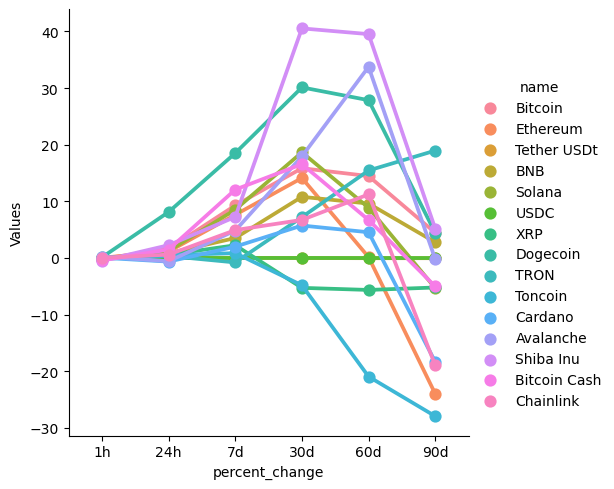

In [37]:
sns.catplot(x = 'percent_change',y='Values',hue = 'name',data=df7, kind='point')

In [39]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67717.62303,2024-10-16 13:07:00.692678
15,Bitcoin,67717.62303,2024-10-16 13:07:11.010801
30,Bitcoin,67717.62303,2024-10-16 13:07:21.211989
45,Bitcoin,67717.62303,2024-10-16 13:07:31.502201
60,Bitcoin,67717.62303,2024-10-16 13:07:46.148894
...,...,...,...
150,Bitcoin,68401.21227,2024-10-18 17:17:52.542554
165,Bitcoin,68390.27012,2024-10-18 17:18:52.810226
180,Bitcoin,68390.27012,2024-10-18 17:19:53.183317
195,Bitcoin,68444.02378,2024-10-18 17:20:53.548250


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/z7/57_rzbhs77z85ck8djjbm76w0000gn/T/ipykernel_33954/1376239796.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


[Text(0, 0, '2024-10-16 13:07:00.692678'),
 Text(1, 0, '2024-10-16 13:07:11.010801'),
 Text(2, 0, '2024-10-16 13:07:21.211989'),
 Text(3, 0, '2024-10-16 13:07:31.502201'),
 Text(4, 0, '2024-10-16 13:07:46.148894'),
 Text(5, 0, '2024-10-16 13:08:49.592379'),
 Text(6, 0, '2024-10-16 13:09:49.967710'),
 Text(7, 0, '2024-10-16 13:10:50.304427'),
 Text(8, 0, '2024-10-16 13:11:50.606314'),
 Text(9, 0, '2024-10-18 17:16:52.262985'),
 Text(10, 0, '2024-10-18 17:17:52.542554'),
 Text(11, 0, '2024-10-18 17:18:52.810226'),
 Text(12, 0, '2024-10-18 17:19:53.183317'),
 Text(13, 0, '2024-10-18 17:20:53.548250'),
 Text(14, 0, '2024-10-18 17:21:53.791299')]

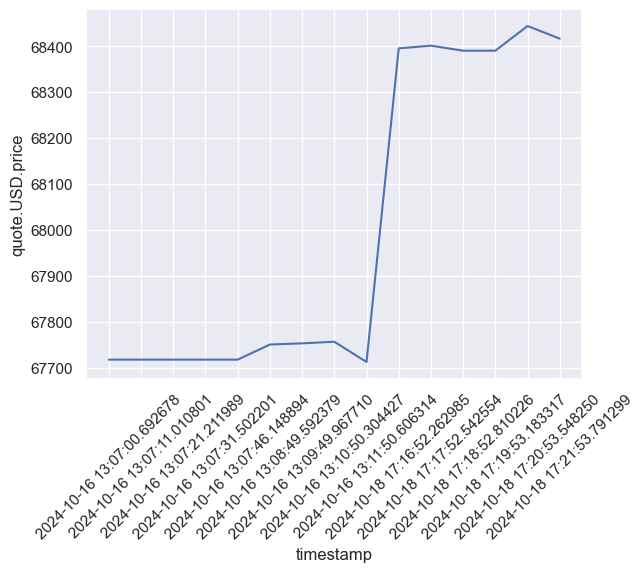

In [41]:
sns.set_theme(style='darkgrid')
axes = sns.lineplot(x='timestamp',y = 'quote.USD.price', data=df10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)